In [1]:
source("src/lib.R")

## CARET

![gather](fig/caret.jpg "title-1")

**CARET** is a package that we are going to use extensively in the next lessons. It provides a unified framework to build predictive models leveraging on the large list of packages belonging to the **R** ecosystem. 

Each one of these packages has its particular interface and to use it you have to adapt your code to this interface.  

**CARET** provides a standard interface with these packages: if you are using **CARET** and you decide to change the statistical methods / implementation in your code, you will simply need to change a few parameters and your code will work seamlessy.

To use this package you have to simply load the package:

In [6]:
library(caret)

You can then retrieve all the models supported by **CARET** using the $\texttt{getModelInfo}()$ function, 

In [7]:
models <- getModelInfo()
sprintf("Number of models: %d", names(models) %>% length)
sprintf("Supported Models: %s", names(models) %>% paste(collapse = ", "))

[1] "Number of models: 237"

[1] "Supported Models: ada, AdaBag, AdaBoost.M1, adaboost, amdai, ANFIS, avNNet, awnb, awtan, bag, bagEarth, bagEarthGCV, bagFDA, bagFDAGCV, bam, bartMachine, bayesglm, binda, blackboost, blasso, blassoAveraged, bridge, brnn, BstLm, bstSm, bstTree, C5.0, C5.0Cost, C5.0Rules, C5.0Tree, cforest, chaid, CSimca, ctree, ctree2, cubist, dda, deepboost, DENFIS, dnn, dwdLinear, dwdPoly, dwdRadial, earth, elm, enet, evtree, extraTrees, fda, FH.GBML, FIR.DM, foba, FRBCS.CHI, FRBCS.W, FS.HGD, gam, gamboost, gamLoess, gamSpline, gaussprLinear, gaussprPoly, gaussprRadial, gbm_h2o, gbm, gcvEarth, GFS.FR.MOGUL, GFS.LT.RS, GFS.THRIFT, glm.nb, glm, glmboost, glmnet_h2o, glmnet, glmStepAIC, gpls, hda, hdda, hdrda, HYFIS, icr, J48, JRip, kernelpls, kknn, knn, krlsPoly, krlsRadial, lars, lars2, lasso, lda, lda2, leapBackward, leapForward, leapSeq, Linda, lm, lmStepAIC, LMT, loclda, logicBag, LogitBoost, logreg, lssvmLinear, lssvmPoly, lssvmRadial, lvq, M5, M5Rules, manb, mda, Mlda, mlp, mlpKerasDecay, mlpKerasDecayCost, mlpKerasDropout, mlpKerasDropoutCost, mlpML, mlpSGD, mlpWeightDecay, mlpWeightDecayML, monmlp, msaenet, multinom, mxnet, mxnetAdam, naive_bayes, nb, nbDiscrete, nbSearch, neuralnet, nnet, nnls, nodeHarvest, null, OneR, ordinalNet, ORFlog, ORFpls, ORFridge, ORFsvm, ownn, pam, parRF, PART, partDSA, pcaNNet, pcr, pda, pda2, penalized, PenalizedLDA, plr, pls, plsRglm, polr, ppr, PRIM, protoclass, qda, QdaCov, qrf, qrnn, randomGLM, ranger, rbf, rbfDDA, Rborist, rda, regLogistic, relaxo, rf, rFerns, RFlda, rfRules, ridge, rlda, rlm, rmda, rocc, rotationForest, rotationForestCp, rpart, rpart1SE, rpart2, rpartCost, rpartScore, rqlasso, rqnc, RRF, RRFglobal, rrlda, RSimca, rvmLinear, rvmPoly, rvmRadial, SBC, sda, sdwd, simpls, SLAVE, slda, smda, snn, sparseLDA, spikeslab, spls, stepLDA, stepQDA, superpc, svmBoundrangeString, svmExpoString, svmLinear, svmLinear2, svmLinear3, svmLinearWeights, svmLinearWeights2, svmPoly, svmRadial, svmRadialCost, svmRadialSigma, svmRadialWeights, svmSpectrumString, tan, tanSearch, treebag, vbmpRadial, vglmAdjCat, vglmContRatio, vglmCumulative, widekernelpls, WM, wsrf, xgbDART, xgbLinear, xgbTree, xyf"

**WOW** 237 models! Note that *not all these models* are natively implemented in **CARET**. Indeed, the majority of them is developed in third-party **R** packages which you must install before using the corresponding models. The result of $\texttt{getModelInfo}()$ can be used to find which package you have to install to use a particular method:

In [8]:
models$lm$label
models$lm$library

[1] "Linear Regression"

NULL

In [9]:
models$kknn$label
models$kknn$library

[1] "k-Nearest Neighbors"

[1] "kknn"

So, if we want to use *k-Nearest Neighbors* model we have to first install the **kknn** package (in the binder image we've already installed it!). On the contrary, if we want to use *Linear Regression* we don't have to install anything (**CARET** uses the standard R function **lm**)

___

#### Ok nice
but how can I fit a model with **CARET**?

Easy. There are just **three** fundamental parameters:
> - $\texttt{x}$: observations
- $\texttt{y}$: labels
- $\texttt{method}$: which model you want to use

In [10]:
train(x = mtcars %>% select(-cyl), 
      y = mtcars$cyl, 
      method = "lm")

Linear Regression 

32 samples
10 predictors

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 32, 32, 32, 32, 32, 32, ... 
Resampling results:

  RMSE      Rsquared   MAE      
  1.024538  0.7631957  0.7657235

Tuning parameter 'intercept' was held constant at a value of TRUE

The model output is quite verbose, here we'll focus only on the *last line*...what is a **tuning parameter**? In a nutshell, it's a parameter on which **CARET** will try to optimize the fitted model (we'll see more on this topic in the second lesson).

Each model supported by **CARET** has its **tuning parameters**. To see which parameters a given model supports, you can explore the output of $\texttt{getModelInfo}()$. Here you have the **tuning parameters** of the *Linear Regression*

In [11]:
models$lm$parameters

parameter,class,label
intercept,logical,intercept


Only one parameter ($\texttt{intercept}$), with a logical (*True* or *False*) class that controls (as the name suggests) the value of the intercept in the fitted model. To set the value of a **tuning parameter** you can use the $\texttt{tuneGrid}$ parameter as follows:

In [12]:
train(x = mtcars %>% select(-cyl), 
      y= mtcars$cyl, 
      method = "lm", 
      tuneGrid = data.frame(intercept = T))$finalModel


Call:
lm(formula = .outcome ~ ., data = dat)

Coefficients:
(Intercept)          mpg         disp           hp         drat           wt  
  12.107199    -0.004857     0.004610     0.003723    -0.427435    -0.222489  
       qsec           vs           am         gear         carb  
  -0.187945    -0.644076    -0.500770    -0.500323     0.179872  


In [13]:
train(x = mtcars %>% select(-cyl), 
      y= mtcars$cyl, 
      method = "lm", 
      tuneGrid = data.frame(intercept = F)
     )$finalModel


Call:
lm(formula = .outcome ~ 0 + ., data = dat)

Coefficients:
      mpg       disp         hp       drat         wt       qsec         vs  
 0.027136   0.008235   0.009147  -0.008767  -0.463077   0.276909  -1.401723  
       am       gear       carb  
-0.452727  -0.233211   0.221562  


Note that selecting the $\texttt{finalModel}$ element of the $\texttt{train}$ function result you can obtain the fitted model description.

Quite often, the **tuning parameters** supported by **CARET** are not all the possible parameters of the underlying fitting procedure. If you want to use a parameter not covered by **CARET** you can *pass it* directly in the $\texttt{train}$ function. As example consider the $\texttt{subset}$ parameter in the $\texttt{lm}$ function, you can provide it to **CARET** as follows:

In [14]:
train(x = mtcars %>% select(-cyl),
      y= mtcars$cyl,
      method = "lm"
     )$finalModel


Call:
lm(formula = .outcome ~ ., data = dat)

Coefficients:
(Intercept)          mpg         disp           hp         drat           wt  
  12.107199    -0.004857     0.004610     0.003723    -0.427435    -0.222489  
       qsec           vs           am         gear         carb  
  -0.187945    -0.644076    -0.500770    -0.500323     0.179872  


In [15]:
train(x = mtcars %>% select(-cyl),
      y= mtcars$cyl,
      method = "lm",
      subset = 1:10 # here you pass the additional tuning parameter!
     )$finalModel


Call:
lm(formula = .outcome ~ ., data = dat, subset = ..1)

Coefficients:
(Intercept)          mpg         disp           hp         drat           wt  
    9.63646     -0.54925      0.02618     -0.03921      3.51626      0.17568  
       qsec           vs           am         gear         carb  
   -0.08000      0.08408      0.82914     -1.41601           NA  


___

## TOY Datasets

In the following lessons we are going to use some simple datasets, that have been developed to challenge the simplest classification models.

These datasets will be generated leveraging some of the functions provided by the **R** package [**mlbench**](https://cran.r-project.org/web/packages/mlbench/index.html).

The full code to generate these datasets is contained the *.R* source file *src/lib.R*. Note that to correctly source this file you should set correctly the working folder:

We can load all the datasets using the $\texttt{get}$*_*$\texttt{full}$*_*$\texttt{dataset}()$ function:

In [16]:
full_df <- get_full_dataset()
full_df %>% head

x,y,class,type
0.89968149,0.83567570,class_1,normal
0.83061160,0.69235862,class_1,normal
0.09275748,0.03199883,class_2,normal
0.02770336,0.23281842,class_2,normal
0.76698485,0.76803599,class_1,normal
0.90857712,0.77285603,class_1,normal


And we can plot its content using **ggplot**

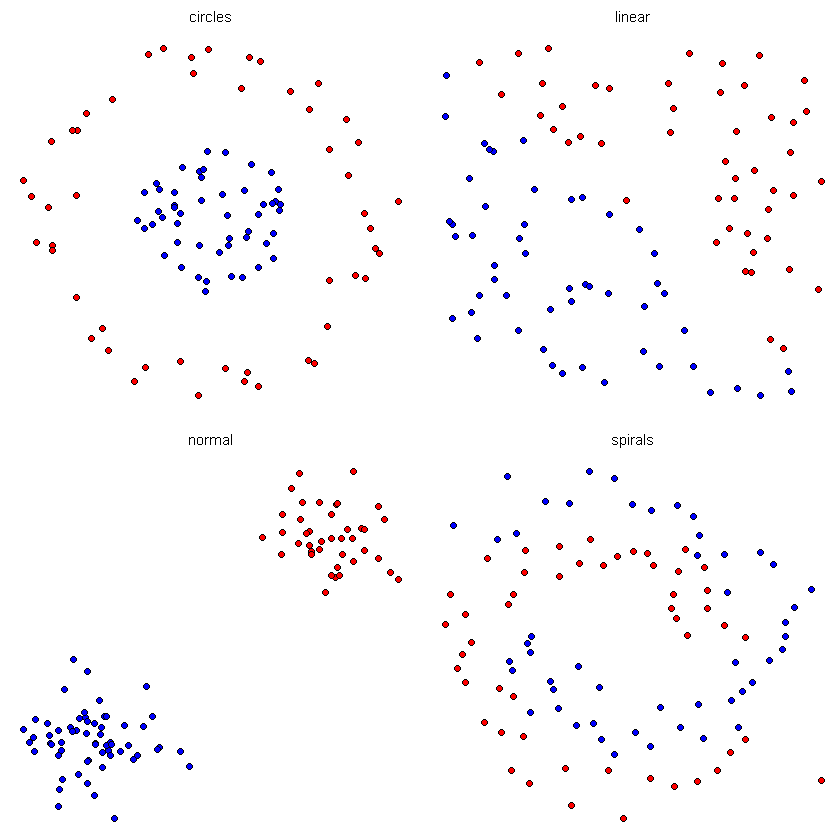

In [17]:
full_df %>% ggplot() + 
    geom_point(aes(x = x, y = y, fill = class), shape = 21) + 
    facet_wrap(~ type) + 
    theme_void() +
    labs(x = "", y = "") +
    scale_fill_manual(values = c("red", "blue")) + 
    guides(fill = F)

In order to better adapt the *toy datasets* to the input/output format required by **CARET** we have prepared an alternative function to obtain these datasets, $\texttt{get}$*_*$\texttt{partitioned}$*_*$\texttt{df}()$:

In [18]:
partitioned_df <- get_partitioned_df()
class(partitioned_df)
names(partitioned_df)
class(partitioned_df$normal)
partitioned_df$normal %>% names

[1] "list"

[1] "normal"  "circles" "spirals" "linear"

[1] "list"

[1] "full"       "full_train" "x_train"    "y_train"    "full_val"  
[6] "x_val"      "y_val"

The output of this function is a **list** with an item for each toy dataset. Each item contains, in turn, both the *full*  dataset and a partition of it in two subsets: the *training* one (*_train*) and the *validation* one (*_val*). We'll see in the next lessons why we need to split a dataset in two partitions. 

For now, note that the $\texttt{get}$*_*$\texttt{partitioned}$*_*$\texttt{df}()$: provides, for both partitions, the input dataframe (*x_*) and the output dataframe (*y_*). These dataframes can be directly used with **CARET** training function as follows:

In [19]:
train(x = partitioned_df$normal$x_train,
      y = partitioned_df$normal$y_train$class, 
      method = "glm")

Generalized Linear Model 

80 samples
 2 predictor
 2 classes: 'class_1', 'class_2' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 80, 80, 80, 80, 80, 80, ... 
Resampling results:

  Accuracy  Kappa
  1         1    


Note that here we used method **glm** (*Generalized Linear Model*) since we are trying to fit a classification problem while the *simpler* **lm** method only works with regression problems (try to replace **glm** with **lm** in the cell above...)